In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from tensorflow import keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


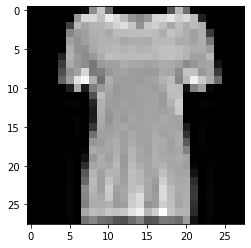

In [5]:
plt.imshow(X_train[10], cmap='gray')

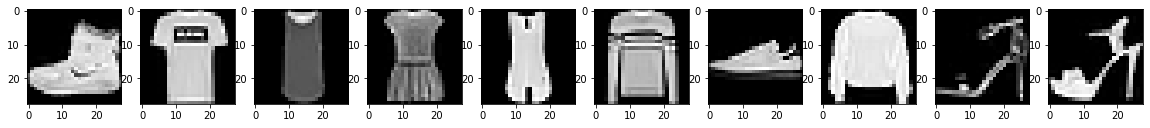

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:10], X_test[0:10])) :
    plt.subplot(1 , 10 , index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[10]]

'T-shirt/top'

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
X = model.fit(X_train,y_train,batch_size=200,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
300/300 [==============================] - 3s 9ms/step - loss: 0.5331 - accuracy: 0.8205 - val_loss: 0.3818 - val_accuracy: 0.8672
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.3434 - accuracy: 0.8792 - val_loss: 0.3546 - val_accuracy: 0.8741
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3038 - accuracy: 0.8925 - val_loss: 0.3182 - val_accuracy: 0.8866
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2770 - accuracy: 0.9023 - val_loss: 0.2925 - val_accuracy: 0.8931
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2589 - accuracy: 0.9086 - val_loss: 0.2826 - val_accuracy: 0.8975
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2457 - accuracy: 0.9130 - val_loss: 0.2806 - val_accuracy: 0.8965
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2303 - accuracy: 0.9179 - val_loss: 0.2773 - val_accuracy: 0.8984
Epoch 

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.9069


[0.2559455931186676, 0.9068999886512756]

In [20]:
model.predict(X_test)

array([[4.6836626e-06, 1.0713089e-07, 2.0320722e-05, ..., 5.8154375e-03,
        2.0054962e-05, 9.8856354e-01],
       [1.7121230e-05, 7.8844586e-13, 9.9980432e-01, ..., 8.2973420e-11,
        1.7797326e-10, 5.8444460e-12],
       [3.2397509e-07, 9.9999917e-01, 8.8312357e-10, ..., 6.4449668e-11,
        1.0656253e-07, 1.5146679e-08],
       ...,
       [8.9288992e-04, 1.1769662e-08, 1.5262018e-04, ..., 3.9576600e-05,
        9.9028510e-01, 5.8235168e-09],
       [4.7302382e-07, 9.9997735e-01, 3.8213972e-08, ..., 3.7148391e-09,
        8.6897124e-08, 6.7413731e-07],
       [4.3816111e-04, 9.8301257e-07, 1.9650892e-03, ..., 6.7223497e-02,
        2.9497951e-02, 1.1726095e-03]], dtype=float32)

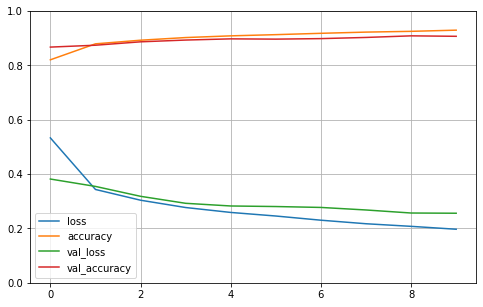

In [21]:
import pandas as pd

pd.DataFrame(X.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()